In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

Daten laden

In [21]:
# Lade die Ergebnisse des Matchings
# df = pd.read_csv("../tests/matching_ergebnis.csv")
# Lade die Ergebnisse der Gantt-Daten
df = pd.read_csv("../tests/gantt_daten.csv", parse_dates=["Start", "Ende"])
print(df.head())  # Vorschau zur Kontrolle
#print(df.info())  # Informationen über den DataFrame
#print("anzahl personen", df["name"].nunique())  # Anzahl der einzigartigen Namen

                      Aufgabe                            Person      Start  \
0     Simulation FEM-Struktur  Dipl.-Ing. Bernd-Dieter Gröttner 2025-05-01   
1   Signalverarbeitung Sensor       Dolores Becker-Hermighausen 2025-06-01   
2       Datenbankmodellierung         Hannelore Junitz-Hartmann 2025-04-01   
3  Thermodynamische Bewertung                    Mandy Gröttner 2025-06-01   

        Ende  Stunden  
0 2025-05-21      160  
1 2025-06-19      144  
2 2025-04-13       96  
3 2025-06-11       80  


Visualisierung vorbereiten

In [22]:
# Seaborn-Stil für klare Achsen und Beschriftungen
sns.set(style="whitegrid")

DataFrame für die tagesbasierte Darstellung

In [23]:
gantt_tage = []

for _, row in df.iterrows():
    tage = int(row["Stunden"] / 8)
    aktuelles_datum = row["Start"]

    for _ in range(tage):
        gantt_tage.append({
            "Datum": aktuelles_datum,
            "Aufgabe": row["Aufgabe"],
            "Person": row["Person"],
            "Aufgabe_Person": f"{row['Aufgabe']} ({row['Person']})"
        })
        aktuelles_datum += timedelta(days=1)

df_tagweise = pd.DataFrame(gantt_tage)

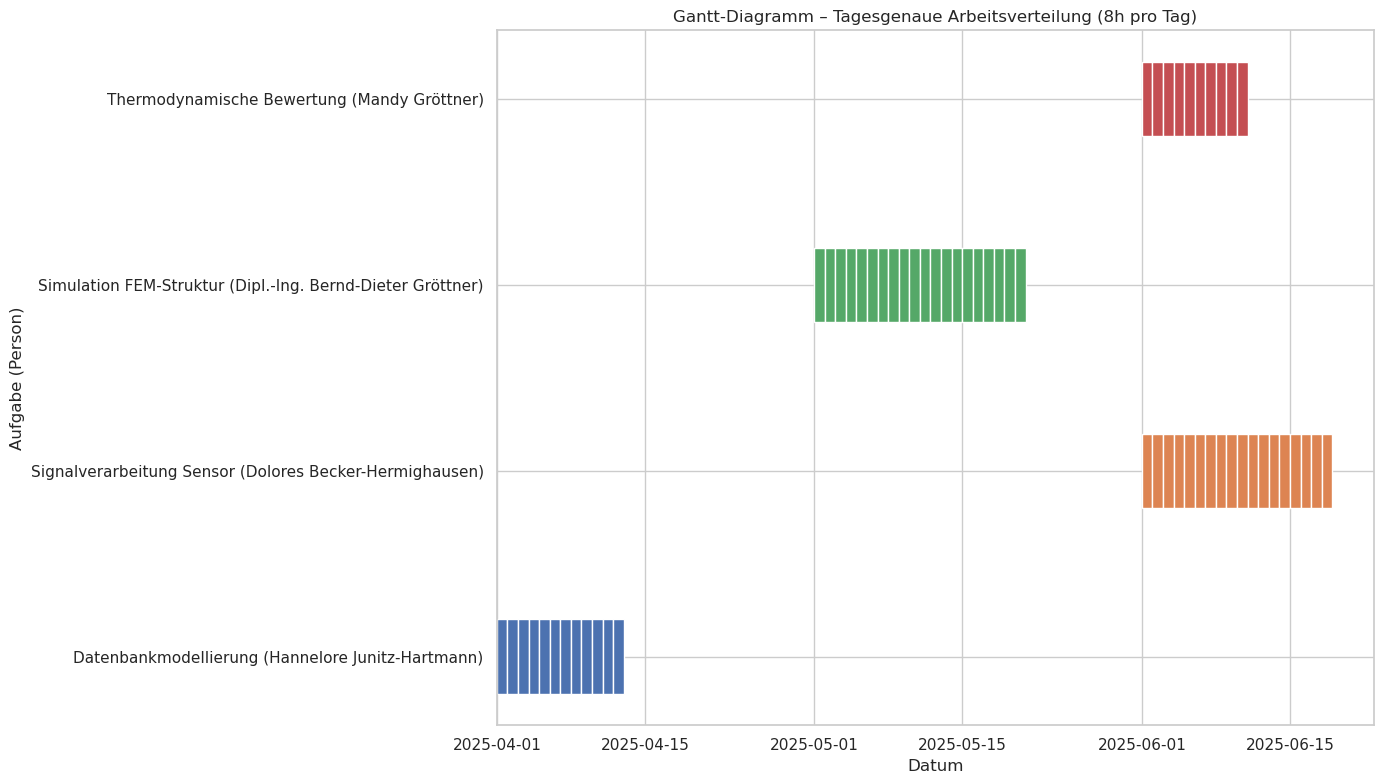

In [24]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Aufgaben nach Startdatum sortieren (für Reihenfolge)
sortierung = df_tagweise.groupby("Aufgabe_Person")["Datum"].min().sort_values().index

# Plot mit horizontalen Balken je Tag
for i, (aufgabe_person, gruppe) in enumerate(df_tagweise.groupby("Aufgabe_Person")):
    plt.barh(
        y=aufgabe_person,
        left=gruppe["Datum"],
        width=1,  # 1 Tag
        height=0.4
    )

plt.xlabel("Datum")
plt.ylabel("Aufgabe (Person)")
plt.title("Gantt-Diagramm – Tagesgenaue Arbeitsverteilung (8h pro Tag)")
plt.tight_layout()
plt.show()


Plot: Aufwand pro Teilaufgabe nach Mitarbeitenden

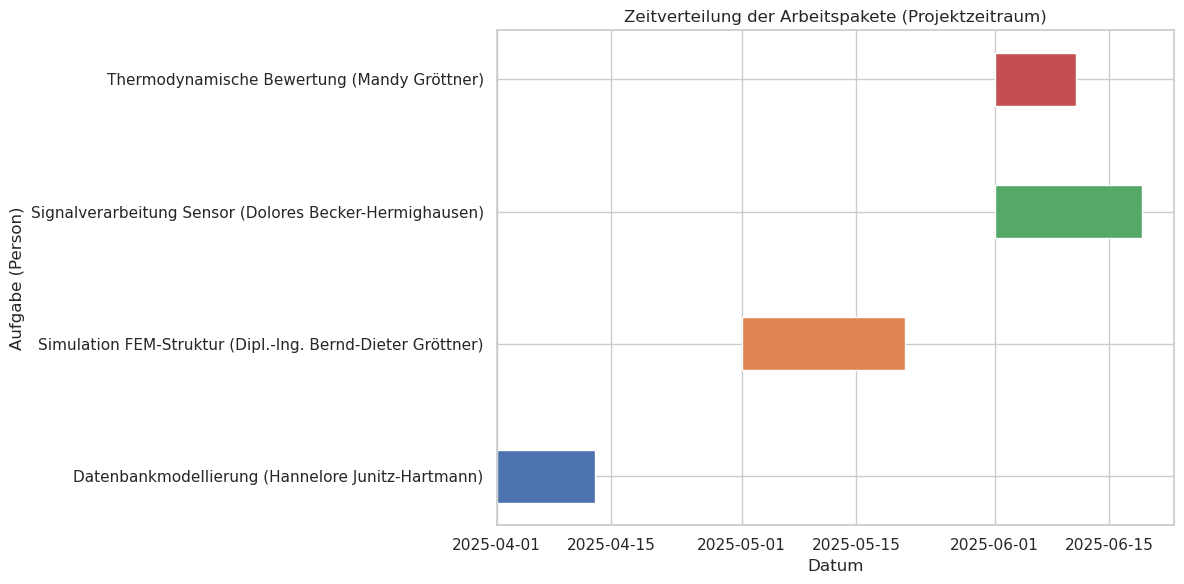

In [16]:
# Plot
plt.figure(figsize=(12, 6))

# Sortiere für übersichtliche Darstellung
df = df.sort_values("Start")

# Gantt-Diagramm
personen_legende = set() # legende für Personen
for i, row in df.iterrows():
    label = row["Person"] if row["Person"] not in personen_legende else ""
    personen_legende.add(row["Person"])

    plt.barh(
        y=f"{row['Aufgabe']} ({row['Person']})",
        width=row["Stunden"] / 8,
        left=row["Start"],
        height=0.4,
        label=label
    )

# Achsen und Layout
plt.xlabel("Datum")
plt.ylabel("Aufgabe (Person)")
plt.title("Zeitverteilung der Arbeitspakete (Projektzeitraum)")
# plt.legend(title="Personen", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()